<a href="https://colab.research.google.com/github/tirals88/DL_for_everyone/blob/main/notebook/1%EC%9E%A5%20%EB%82%98%EC%9D%98%20%EC%B2%AB%20%EB%94%A5%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

'모두의 딥러닝' 책 스터디 내용을 jupyter notebook으로 정리하여 올립니다.

Github 주소 : 'https://github.com/gilbutITbook/080228'

**모두의 딥러닝**



# 01 장 나의 첫 딥러닝

In [ ]:
# 폐암 수술 환자의 생존율 예측하기 실습 / 예제 코드

# 딥러닝 구동으리 위한 케라스 함수 호출

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#필요한 라이브러리 불러오기

import numpy as np
import tensorflow as tf

# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분

np.random.seed(3)
tf.random.set_seed(3)

# 준비된 수술 환자 데이터 불러오기
Data_set = np.loadtxt(".../dataset/ThoraricSurgery.csv", delimiter=",")

이 때 하나의 생선 데이터를 샘플 sample 이라고 부르자. 총 49개의 샘플이 있으며 사용하는 특성은 길이와 무게 2개이다.<br/>먼저 앞 35개를 훈련세트, 14개를 테스트 세트로 사용할 것이다.

In [ ]:
train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

정확도가 0으로 나온 이유는 생선 데이터에는 도미와 빙어가 있지만, 훈련 데이터에는 빙어의 데이터가 없기 때문에 빙어를 올바르게 분류할 수가 없다.

훈련 세트와 테스트 세트를 나누려면 도미와 빙어가 골고루 섞이게 만들어야 한다.

이러한 골고루 섞여 있지 않는 것을 치우쳤다는 의미로 **샘플링 편향 sampling bias**라고 부른다.

## 넘파이 Numpy

파이썬의 리스트로 2차원 리스트를 표현할 수 있지만 고차원 리스트를 표현하려면 매우 번거롭다. 넘파이는 고차원의 배열을 손쉽게 만들고 조작할 수 있는 도구를 많이 제공한다.

In [ ]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

print(input_arr[:8])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]
 [ 29.7 450. ]
 [ 29.7 500. ]
 [ 30.  390. ]]


이제 이 배열에서 랜덤하게 샘플을 선택해 훈련 세트와 테스트 세트로 만들 차례이다.

여기에서는 섞은 후 나누는 방식 대신, 무작위로 샘플을 고르는 방법을 사용할 것이다.

**주의 할 점은 input_arr 와 target_arr에서 같은 위치는 함께 선택되어야 한다는 점이다.**

항상 인덱스 값을 기억할 수는 없으니 인덱스를 섞은 다음 input_arr 와 target_arr에서 샘플을 선택하면 무작위로 훈련 세트를 나누느 셈이 된다.

In [ ]:
# arange() 함수를 사용하여 0~48 까지의 인덱스를 만들고 인덱스를 랜덤하게 섞는다

np.random.seed(42) #시드 고정
index = np.arange(49)
np.random.shuffle(index)

print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


넘파이는 슬라이싱 외에 **배열 인덱싱 array indexing** 이란 기능을 제공한다. 1개의 인덱스가 아닌, 여러개의 인덱스로 한 번에 여러개의 원소를 선택할 수 있다.

In [ ]:
print(input_arr[1])
print('\n')
print(input_arr[[1,3]])

[ 26.3 290. ]


[[ 26.3 290. ]
 [ 29.  363. ]]


In [ ]:
# 랜덤하게 35개의 샘플을 훈련 세트로 지정

train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

print(input_arr[13], train_input[0]) # index[0] = 13

[ 32. 340.] [ 32. 340.]


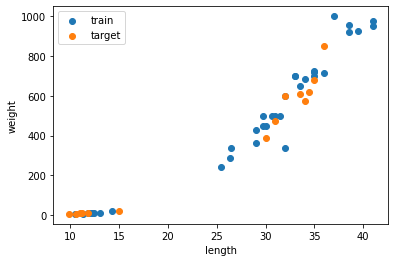

In [ ]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:, 1], label = 'train')
plt.scatter(test_input[:, 0], test_input[:, 1], label = 'target')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show() # 데이터가 골고루 섞였음을 볼 수 있다.

## 두 번쨰 머신러닝 프로그램


In [ ]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [ ]:
# _predict() 메서드로 테스트 세트 예측결과와 실제 타깃 확인

print(kn.predict(test_input))
print(test_target)

[0 0 1 0 1 1 1 0 1 1 0 1 1 0]
[0 0 1 0 1 1 1 0 1 1 0 1 1 0]


### 고찰

predict() 메서드의 출력 결과가 test_target의 출력과 동일하게 array()로 감싸 있는 것을 확인할 수 있다. 넘파이 배열을 의미하며 predict()가 반환하는 값은 파이썬 리스트가 아닌, 넘파이 배열이다.

**이 절에서는 넘파이의 shuffle() 함수를 사용해 배열의 인덱스를 섞어 골고루 훈련과 테스트 세트로 나누어 학습을 하였다.**